
In the context of the "Machine Learning with Python: Zero to GBMs" project, we will delve into the application of machine learning techniques to predict "kicked" cars in auto auctions. By leveraging a carefully curated dataset, we will employ feature engineering techniques and fine-tune classifiers to deliver tangible value to dealerships. The objective is to develop a robust model that can accurately identify cars that are likely to be problematic or unsatisfactory, thereby assisting dealerships in making informed decisions during auctions. Through this project, we aim to showcase the power of machine learning in the automotive industry and its potential to enhance decision-making processes.



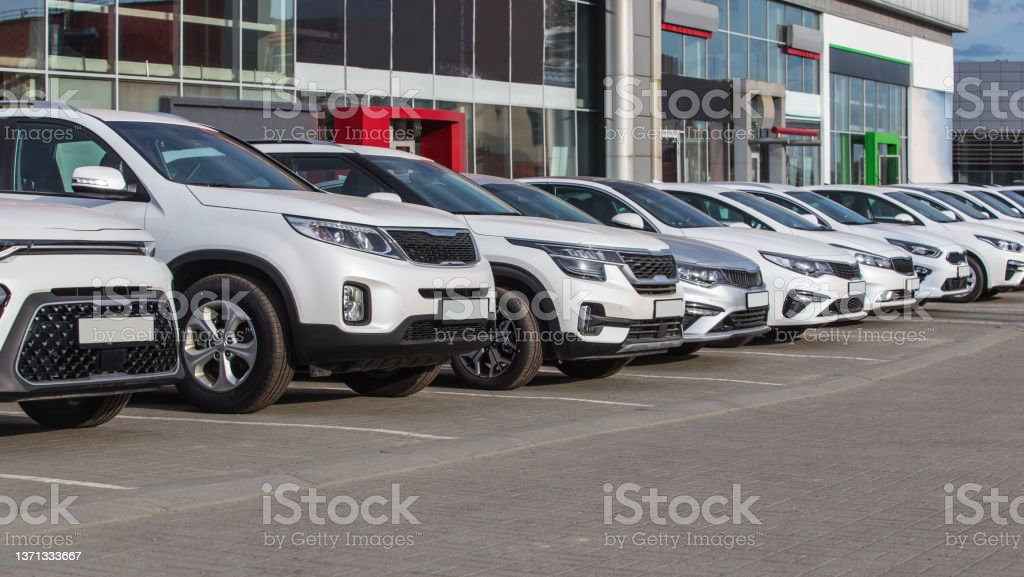

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).

## Column Description

- RefID = Unique (sequential) number assigned to vehicles
- IsBadBuy = Identifies if the kicked vehicle was an - - - - - avoidable purchase
- PurchDate = The Date the vehicle was Purchased at Auction
- Auction = Auction provider at which the vehicle was purchased
- VehYear = The manufacturer's year of the vehicle
- VehicleAge= The Years elapsed since the manufacturer's year
- Make = Vehicle Manufacturer
- Model = Vehicle Model
- Trim = Vehicle Trim Level
- SubModel = Vehicle Submodel
- Color = Vehicle Color
- Transmission = Vehicles transmission type (Automatic, Manual)
- WheelTypeID = The type id of the vehicle wheel
- WheelType = The vehicle wheel type description (Alloy, Covers)
- VehOdo = The vehicles odometer reading
- Nationality = The Manufacturer's country
- Size = The size category of the vehicle (Compact, SUV, etc.)
- TopThreeAmericanName = Identifies if the manufacturer is one of the top three American manufacturers
- MMRAcquisitionAuctionAveragePrice= Acquisition price for this vehicle in average condition at time of purchase
- MMRAcquisitionAuctionCleanPrice = Acquisition price for this vehicle in the above Average condition at time of purchase
- MMRAcquisitionRetailAveragePrice= Acquisition price for this vehicle in the retail market in average condition at time of purchase
- MMRAcquisitonRetailCleanPrice = Acquisition price for this vehicle in the retail market in above average condition at time of purchase
- MMRCurrentAuctionAveragePrice = Acquisition price for this vehicle in average condition as of current day
- MMRCurrentAuctionCleanPrice = Acquisition price for this vehicle in the above condition as of current day
- MMRCurrentRetailAveragePrice = Acquisition price for this vehicle in the retail market in average condition as of current day
- MMRCurrentRetailCleanPrice = Acquisition price for this vehicle in the retail market in above average condition as of current day
- PRIMEUNIT = Identifies if the vehicle would have a higher demand than a standard purchase
- AcquisitionType = Identifies how the vehicle was aquired (Auction buy, trade in, etc)
- AUCGUART = The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow * Light - caution/issue, red light - sold as is)
- KickDate = Date the vehicle was kicked back to the auction
BYRNO = Unique number assigned to the buyer that purchased the vehicle
- VNZIP = Zipcode where the car was purchased
- VNST = State where the the car was purchased
- VehBCost = Acquisition cost paid for the vehicle at time of purchase
- IsOnlineSale = Identifies if the vehicle was originally purchased online
- WarrantyCost = Warranty price (term=36month and millage=36K)

# car-use

Use the "Run" button to execute the code.

In [ ]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets jovian --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import jovian

In [ ]:
jovian.set_project('https://jovian.com/josephatkariuki24/car-use')
jovian.set_colab_id('1fZmzEEujiGQB33lW2n7e0fyH3iqRmUu0')

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/DontGetKicked/code'

In [ ]:
jovian.commit(project='car-use.ipynb')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-41d92


'https://jovian.com/josephatkariuki24/car-use-41d92'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kiariejoe1996
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 67.9MB/s]


Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [ ]:
df = pd.read_csv('./DontGetKicked/training.csv',parse_dates=['PurchDate'])


In [ ]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72983 non-null  int64         
 1   IsBadBuy                           72983 non-null  int64         
 2   PurchDate                          72983 non-null  datetime64[ns]
 3   Auction                            72983 non-null  object        
 4   VehYear                            72983 non-null  int64         
 5   VehicleAge                         72983 non-null  int64         
 6   Make                               72983 non-null  object        
 7   Model                              72983 non-null  object        
 8   Trim                               70623 non-null  object        
 9   SubModel                           72975 non-null  object        
 10  Color                             

In [ ]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [ ]:
df.shape

(72983, 34)

Our training dataset contain 72983 rows and 34 columns.

# Loading the Test Set

In [ ]:
test_df = pd.read_csv('./DontGetKicked/test.csv',parse_dates=['PurchDate'])

In [ ]:
test_df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,2009-12-02,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,2009-12-02,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,2009-12-02,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,2009-12-02,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,2009-12-02,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              48707 non-null  int64         
 1   PurchDate                          48707 non-null  datetime64[ns]
 2   Auction                            48707 non-null  object        
 3   VehYear                            48707 non-null  int64         
 4   VehicleAge                         48707 non-null  int64         
 5   Make                               48707 non-null  object        
 6   Model                              48707 non-null  object        
 7   Trim                               47157 non-null  object        
 8   SubModel                           48702 non-null  object        
 9   Color                              48703 non-null  object        
 10  Transmission                      

In [ ]:
test_df.shape

(48707, 33)

The test dataset contain 48707 rows and 33 columns.

In [ ]:
test_df.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,48707.000000,48707.000000,48707.000000,46519.000000,48707.000000,48697.000000,48697.000000,48697.000000,48697.000000,48564.000000,48564.000000,48564.000000,48564.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000
mean,97378.396144,2005.331533,4.215801,1.462198,71576.351448,6134.883997,7393.486313,8550.143869,9920.585662,6112.367247,7382.808994,8812.130014,10195.801334,25432.898906,54198.092636,6760.866483,0.022009,1281.105755
std,14067.338432,1.730500,1.704778,0.516574,14487.934950,2453.918764,2715.515852,3130.915999,3361.101528,2427.325384,2682.991119,3062.179799,3285.030551,24137.133174,26053.831141,1757.034461,0.146715,612.003001
min,73015.000000,2001.000000,0.000000,1.000000,223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,3106.000000,1625.000000,0.000000,462.000000
25%,85195.500000,2004.000000,3.000000,1.000000,62226.500000,4283.000000,5432.000000,6378.000000,7579.000000,4247.000000,5391.000000,6622.000000,7876.000000,17212.000000,32750.000000,5480.000000,0.000000,853.000000
50%,97378.000000,2005.000000,4.000000,1.000000,73412.000000,6115.000000,7308.000000,8495.000000,9881.000000,6050.000000,7280.000000,8749.000000,10136.000000,19638.000000,40509.000000,6730.000000,0.000000,1209.000000
75%,109560.500000,2007.000000,5.000000,2.000000,82419.500000,7755.000000,9044.000000,10666.000000,12184.000000,7677.000000,9028.000000,10869.250000,12374.000000,21973.000000,78219.000000,7935.000000,0.000000,1623.000000
max,121746.000000,2010.000000,9.000000,3.000000,114786.000000,27584.000000,30843.000000,32456.000000,35754.000000,27009.000000,30516.000000,31677.000000,36036.000000,99791.000000,98064.000000,56950.000000,1.000000,7498.000000


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-30aea


'https://jovian.com/josephatkariuki24/car-use-30aea'

## Feature Engineering

In [ ]:
df['Purchase_Year']=df['PurchDate'].dt.year
df['Purchase_Year']= df['PurchDate'].dt.year

# Exploratory Data Analysis

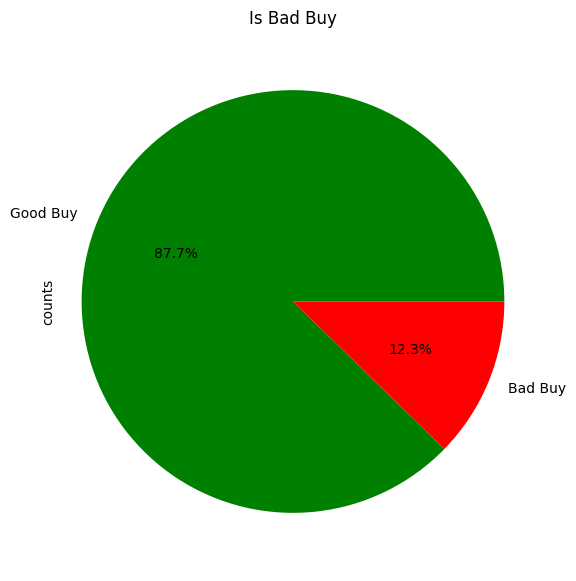

In [ ]:
labels = ['Good Buy', 'Bad Buy']
colors = ['green', 'red']
a=df.IsBadBuy.value_counts()
plt.figure(figsize=(6, 7))
plt.pie(a, labels=labels, colors=colors, autopct='%1.1f%%')
plt.ylabel('counts')
plt.title("Is Bad Buy")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Among the vehicles being auctioned, 87.7% are good buys while the remaining percentage are bad buys.

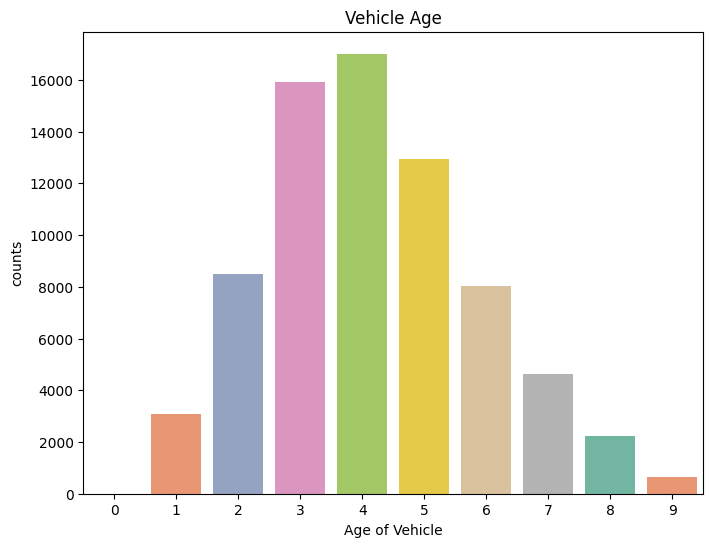

In [ ]:
age=pd.DataFrame(df.VehicleAge.value_counts())
plt.figure(figsize=(8, 6))
sns.barplot(x=age.index,y='VehicleAge',data=age,palette='Set2')
plt.ylabel('counts')
plt.xlabel('Age of Vehicle')
plt.title("Vehicle Age")
plt.show()

Majority of the vehicles being auctioned have are of age three to five years after being manufactured.

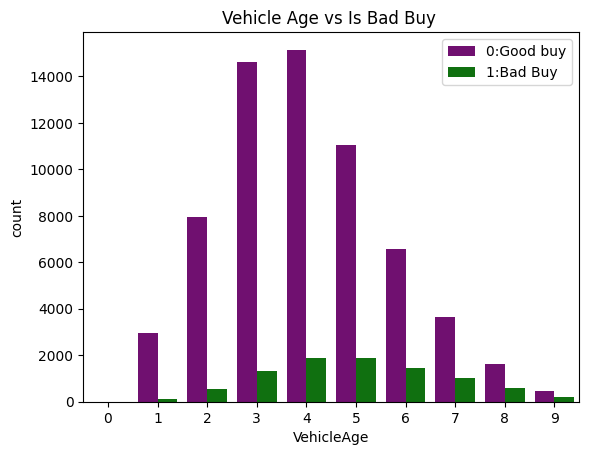

In [ ]:
plt.title("Vehicle Age vs Is Bad Buy ")
sns.countplot(x = "VehicleAge", data =df, hue = "IsBadBuy",palette=['purple', 'green'])
plt.legend(['0:Good buy','1:Bad Buy'])
plt.show()

Majority of the vehicles that are bad buys are of age four and five years after they have been manufactured.

In [ ]:
import plotly.express as px

In [ ]:
# Define the color mapping
color_map = {'0': 'green', '1': 'orange'}

# Function to generate histogram plot
def generate_histogram(df, x_column, color_column, color_mapping, height=500, width=800):
    fig = px.histogram(df, x=x_column, color=color_column, height=height, width=width,
                       color_discrete_map=color_mapping)
    fig.update_layout(legend_title="Is Bad Buy", legend=dict(x=0.85, y=0.95))
    fig.show()

# Generate the histogram plot using the function
generate_histogram(df, "Make", "IsBadBuy", color_map)

Ford,Chevrolet,Dodge,and Chrysler respectively are make with the highest number of bad buys among other makes.

## Correlation of Numerical Columns

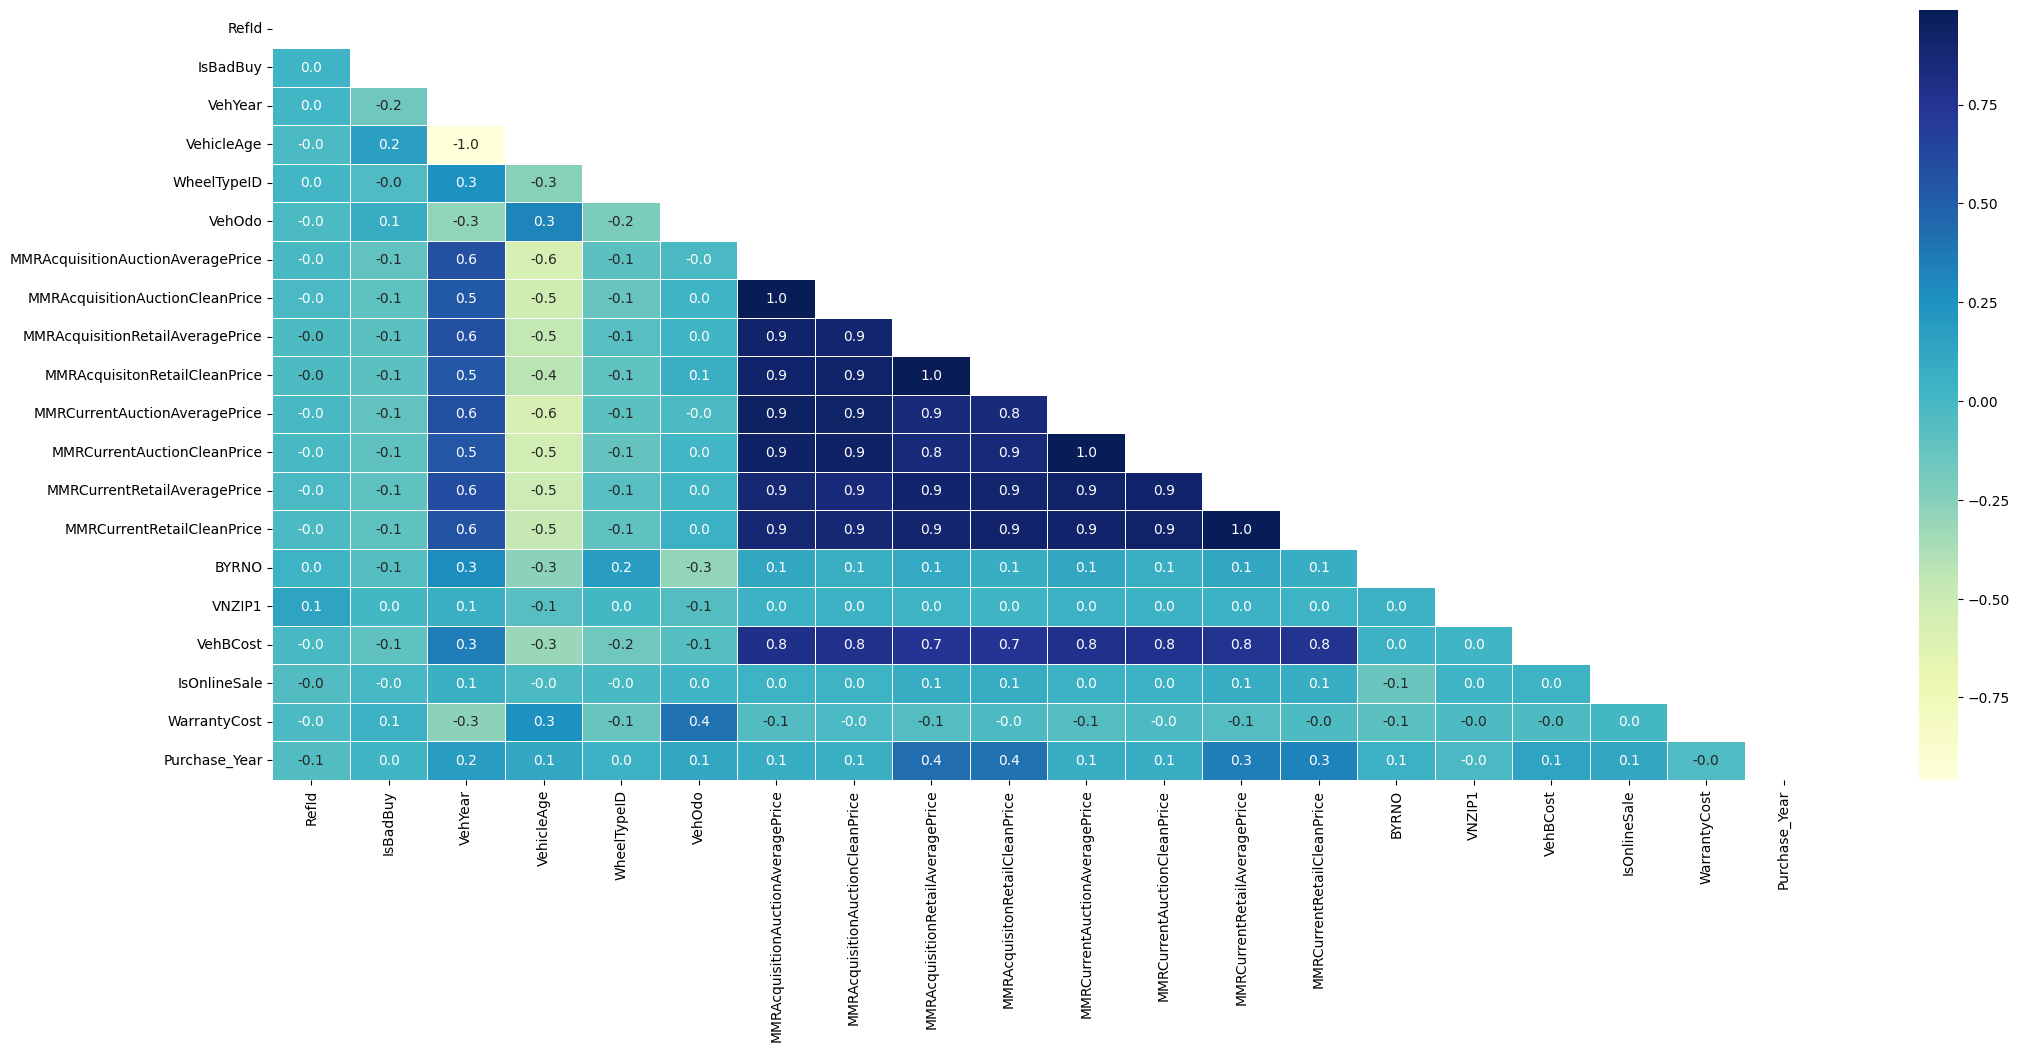

In [ ]:
plt.figure(figsize=(25,10))
mask_matrix = np.triu(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True, linewidths=.5, fmt='.1f', mask=mask_matrix)
plt.show()

## Asking & Answering Questions

1. Which year was the most of the vehicles manufactured?

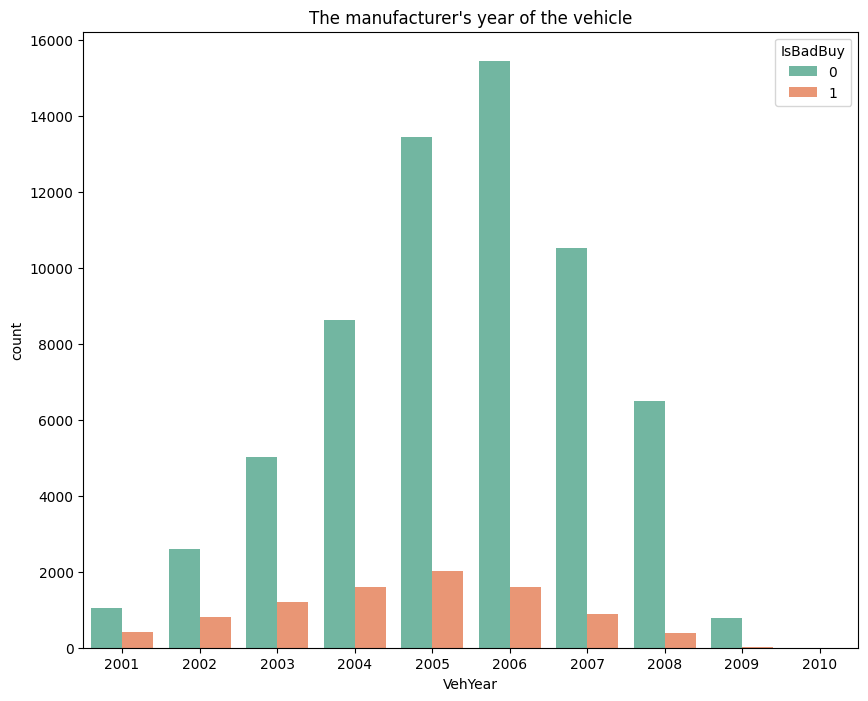

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("The manufacturer's year of the vehicle")
sns.countplot(data=df, x='VehYear', hue='IsBadBuy',
              palette='Set2', linewidth=2)
plt.show()

Majority of the vehicles were manufactured in the year 2006 .

2.Which year was most of the vehicles purchased in the auctioned?

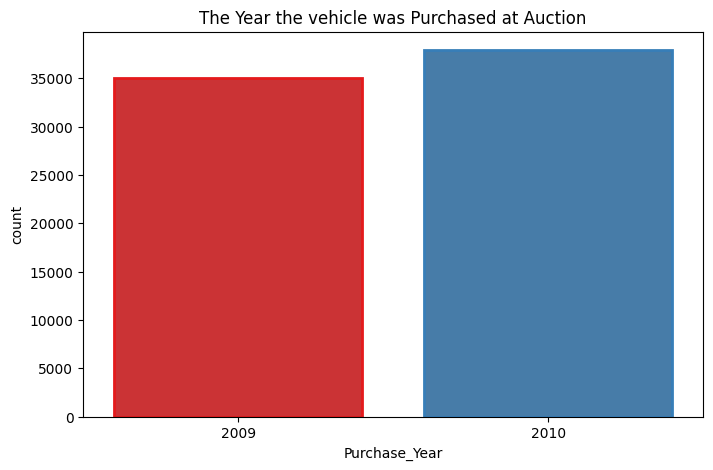

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("The Year the vehicle was Purchased at Auction")
sns.countplot(data=df, x='Purchase_Year',
              palette='Set1',
              linewidth=2,
              edgecolor=sns.color_palette('Set1', 2))
plt.show()

Majority of the vehicles were purchased in the year 2010 .

3. What is the most common color among the vehicles being auctioned?

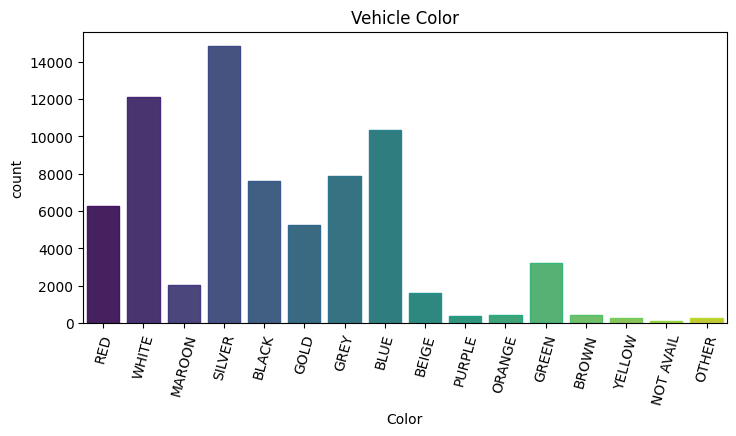

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Vehicle Color')
plt.xticks(rotation=75)
sns.countplot(data=df,
             x='Color',
             palette='viridis',
             edgecolor=sns.color_palette('viridis', 17))
plt.tight_layout(pad=3)
plt.show()

Majority of the vehicles being auctioned are of silver color.

In [ ]:
jovian.commit ()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-e5a19


'https://jovian.com/josephatkariuki24/car-use-e5a19'

# Training, Validation and Test Sets

In [ ]:
!pip install scikit-learn --upgrade --quiet

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (58386, 35)
val_df.shape : (14597, 35)
test_df.shape : (48707, 33)


In [ ]:
train_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Purchase_Year
9093,9102,0,2009-02-23,MANHEIM,2007,2,FORD,FREESTYLE FWD V6 3.0,SEL,4D CUV 3.0L SEL,...,15386.0,NaN,NaN,17675,27542,NC,8000.0,0,1506,2009
13320,13330,0,2009-02-03,MANHEIM,2004,5,GMC,ENVOY 4WD 6C 4.2L I6,SLE,4D UTILITY 4.2L,...,11429.0,NaN,NaN,20740,21075,MD,7195.0,0,2152,2009
29596,29617,0,2010-02-26,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,11757.0,NaN,NaN,99761,74135,OK,7300.0,0,754,2010
45118,45142,0,2009-04-23,OTHER,2004,5,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,4D SEDAN,...,5803.0,NaN,NaN,3453,80229,CO,5655.0,0,1974,2009
2949,2952,0,2010-06-02,OTHER,2006,4,HYUNDAI,SONATA 4C,GLS,4D SEDAN GLS,...,10548.0,NaN,NaN,8172,35004,AL,7900.0,0,728,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,37217,1,2010-06-08,MANHEIM,2007,3,CHRYSLER,SEBRING V6,Bas,4D SEDAN,...,11962.0,NaN,NaN,99750,46803,IN,8300.0,0,1118,2010
6265,6272,0,2010-04-29,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN,...,8957.0,NaN,NaN,18881,30272,GA,7045.0,0,533,2010
54886,54914,0,2010-07-09,OTHER,2006,4,CHEVROLET,MALIBU 4C,LT,4D SEDAN LT,...,11984.0,NaN,NaN,99750,73108,OK,6700.0,0,1113,2010
860,862,0,2009-09-29,ADESA,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,4D SEDAN,...,12057.0,NaN,NaN,99740,50111,IA,7295.0,0,1272,2009


In [ ]:
val_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Purchase_Year
27851,27871,0,2009-06-03,MANHEIM,2003,6,FORD,WINDSTAR FWD V6 3.8L,LX,PASSENGER 3.8L LX,...,4284.0,NaN,NaN,5546,32824,FL,4200.0,0,2157,2009
51596,51624,0,2009-11-17,MANHEIM,2004,5,FORD,EXPLORER 4WD V6,XLS,4D SUV 4.0L FFV XLS,...,11622.0,NaN,NaN,99750,80011,CO,6800.0,0,1893,2009
31933,31955,0,2009-08-14,OTHER,2005,4,CHRYSLER,PACIFICA FWD 3.5L V6,Tou,4D SPORT TOURING,...,9145.0,NaN,NaN,20740,29461,SC,8800.0,0,1086,2009
12335,12344,0,2009-07-28,OTHER,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,4D SEDAN,...,9151.0,NaN,NaN,21053,95673,CA,7305.0,0,1272,2009
68933,68965,0,2009-09-10,ADESA,2006,3,MITSUBISHI,ENDEAVOR FWD 3.8L V6,LS,4D SPORT UTILITY LS,...,12895.0,NaN,NaN,21973,32219,FL,8300.0,0,569,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,52582,0,2010-02-18,MANHEIM,2004,6,MAZDA,MAZDA6,i,4D SEDAN I,...,9797.0,NaN,NaN,10430,39402,MS,8405.0,1,1003,2010
50223,50251,0,2009-02-25,MANHEIM,2004,5,DODGE,CARAVAN FWD V6 3.3L,SE,MINIVAN 3.3L SE,...,7512.0,NaN,NaN,18822,78219,TX,4335.0,0,1763,2009
15260,15270,1,2010-04-21,MANHEIM,2005,5,CHEVROLET,IMPALA,Bas,4D SEDAN,...,8788.0,NaN,NaN,20234,94544,CA,6035.0,0,1974,2010
26629,26647,0,2009-10-06,MANHEIM,2007,2,DODGE,CALIBER 2.0L I4 SFI,Bas,4D WAGON,...,12247.0,NaN,NaN,17212,75050,TX,7540.0,0,825,2009


In [ ]:
test_df

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,2009-12-02,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,2009-12-02,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,2009-12-02,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,2009-12-02,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,2009-12-02,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,2010-11-17,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,...,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,2010-11-17,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,...,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,2010-11-17,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,2010-11-17,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,...,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-96e41


'https://jovian.com/josephatkariuki24/car-use-96e41'

## Identifying Input and Target Columns

## Extract Inputs and Outputs

In [ ]:
input_cols = ['Auction','VehicleAge','WheelType','TopThreeAmericanName','MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
               'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
                'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice', 'PRIMEUNIT',
              'IsOnlineSale', 'WarrantyCost']


In [ ]:
target_col ='IsBadBuy'

For further processing and model training,We can now create inputs and targets for the training, validation and test sets.



In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()

In [ ]:
val_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Purchase_Year
27851,27871,0,2009-06-03,MANHEIM,2003,6,FORD,WINDSTAR FWD V6 3.8L,LX,PASSENGER 3.8L LX,...,4284.0,NaN,NaN,5546,32824,FL,4200.0,0,2157,2009
51596,51624,0,2009-11-17,MANHEIM,2004,5,FORD,EXPLORER 4WD V6,XLS,4D SUV 4.0L FFV XLS,...,11622.0,NaN,NaN,99750,80011,CO,6800.0,0,1893,2009
31933,31955,0,2009-08-14,OTHER,2005,4,CHRYSLER,PACIFICA FWD 3.5L V6,Tou,4D SPORT TOURING,...,9145.0,NaN,NaN,20740,29461,SC,8800.0,0,1086,2009
12335,12344,0,2009-07-28,OTHER,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,4D SEDAN,...,9151.0,NaN,NaN,21053,95673,CA,7305.0,0,1272,2009
68933,68965,0,2009-09-10,ADESA,2006,3,MITSUBISHI,ENDEAVOR FWD 3.8L V6,LS,4D SPORT UTILITY LS,...,12895.0,NaN,NaN,21973,32219,FL,8300.0,0,569,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,52582,0,2010-02-18,MANHEIM,2004,6,MAZDA,MAZDA6,i,4D SEDAN I,...,9797.0,NaN,NaN,10430,39402,MS,8405.0,1,1003,2010
50223,50251,0,2009-02-25,MANHEIM,2004,5,DODGE,CARAVAN FWD V6 3.3L,SE,MINIVAN 3.3L SE,...,7512.0,NaN,NaN,18822,78219,TX,4335.0,0,1763,2009
15260,15270,1,2010-04-21,MANHEIM,2005,5,CHEVROLET,IMPALA,Bas,4D SEDAN,...,8788.0,NaN,NaN,20234,94544,CA,6035.0,0,1974,2010
26629,26647,0,2009-10-06,MANHEIM,2007,2,DODGE,CALIBER 2.0L I4 SFI,Bas,4D WAGON,...,12247.0,NaN,NaN,17212,75050,TX,7540.0,0,825,2009


In [ ]:
val_targets

27851    0
51596    0
31933    0
12335    0
68933    0
        ..
52554    0
50223    0
15260    1
26629    0
38747    0
Name: IsBadBuy, Length: 14597, dtype: int64

 identifying which of the columns are numerical and which ones are categorical.

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np


In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Let's view some statistics for the numeric columns.

In [ ]:
train_inputs[numeric_cols].describe()

,VehicleAge,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,IsOnlineSale,WarrantyCost
count,58386.000000,58373.000000,58373.000000,58373.000000,58373.000000,58129.000000,58129.000000,58129.000000,58129.000000,58386.000000,58386.000000
mean,4.174443,6130.330238,7374.853802,8500.725524,9855.297946,6135.623665,7393.720879,8780.562852,10149.699444,0.025520,1277.162402
std,1.709252,2459.803624,2719.909130,3154.129661,3383.052430,2433.425240,2684.033702,3087.768379,3306.145504,0.157699,598.944079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,462.000000
25%,3.000000,4275.000000,5410.000000,6288.000000,7501.000000,4279.000000,5417.000000,6551.000000,7801.000000,0.000000,837.000000
50%,4.000000,6099.000000,7311.000000,8451.000000,9796.000000,6070.000000,7324.000000,8726.000000,10103.000000,0.000000,1169.000000
75%,5.000000,7765.000000,9023.000000,10659.000000,12089.000000,7736.000000,9017.000000,10917.000000,12309.000000,0.000000,1623.000000
max,9.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,1.000000,7498.000000


Checking the number of categories in each of the categorical columns.

In [ ]:
train_inputs[categorical_cols].nunique()

Auction                 3
WheelType               3
TopThreeAmericanName    4
PRIMEUNIT               2
dtype: int64

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-0a355


'https://jovian.com/josephatkariuki24/car-use-0a355'

## Imputing Missing Numeric Data

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

Check the no. of missing values in each numeric column before performing imputation.

In [ ]:
df[numeric_cols].isna().sum()

VehicleAge                             0
MMRAcquisitionAuctionAveragePrice     18
MMRAcquisitionAuctionCleanPrice       18
MMRAcquisitionRetailAveragePrice      18
MMRAcquisitonRetailCleanPrice         18
MMRCurrentAuctionAveragePrice        315
MMRCurrentAuctionCleanPrice          315
MMRCurrentRetailAveragePrice         315
MMRCurrentRetailCleanPrice           315
IsOnlineSale                           0
WarrantyCost                           0
dtype: int64

Checking the no. of missing values individually for train_inputs, val_inputs and test_inputs.



In [ ]:
train_inputs[numeric_cols].isna().sum()

VehicleAge                             0
MMRAcquisitionAuctionAveragePrice     13
MMRAcquisitionAuctionCleanPrice       13
MMRAcquisitionRetailAveragePrice      13
MMRAcquisitonRetailCleanPrice         13
MMRCurrentAuctionAveragePrice        257
MMRCurrentAuctionCleanPrice          257
MMRCurrentRetailAveragePrice         257
MMRCurrentRetailCleanPrice           257
IsOnlineSale                           0
WarrantyCost                           0
dtype: int64

The first step in imputation is to fit the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset.

In [ ]:
imputer.fit(df[numeric_cols])

SimpleImputer()

Transform method of imputer can be used to fill the missing values of the training, test and validation sets.



In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [ ]:
train_inputs[numeric_cols].isna().sum()

VehicleAge                           0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-648d7


'https://jovian.com/josephatkariuki24/car-use-648d7'

## Scaling Numeric Features

Since the numeric column in our dataset have varying range of values, we can use MinMaxScaler from sklearn.preprocessing to scale values to the
(
0
,
1
)
 range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

Let's fit the scaler to compute the range of values for each numeric column.

In [ ]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

Let's inspect the minimum and maximum values in each column.



In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 462.0]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[9.0,
 35722.0,
 36859.0,
 39080.0,
 41482.0,
 35722.0,
 36859.0,
 39080.0,
 41062.0,
 1.0,
 7498.0]

 Let's use the transform method of scaler to separately scale the training, validation and test sets.

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

verifying that values in each column lie in the range
(
0
,
1
)

In [ ]:
train_inputs[numeric_cols].describe()

,VehicleAge,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,IsOnlineSale,WarrantyCost
count,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,0.463827,0.171612,0.200083,0.217521,0.237580,0.171760,0.200594,0.224681,0.247179,0.025520,0.115856
std,0.189917,0.068852,0.073784,0.080701,0.081546,0.067971,0.072659,0.078837,0.080339,0.157699,0.085126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.119674,0.146776,0.160907,0.180825,0.120066,0.147210,0.167970,0.190273,0.000000,0.053297
50%,0.444444,0.170763,0.198350,0.216274,0.236175,0.170427,0.199110,0.223976,0.246408,0.000000,0.100483
75%,0.555556,0.217373,0.244771,0.272723,0.291428,0.216421,0.244418,0.279043,0.299718,0.000000,0.165009
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-e36d7


'https://jovian.com/josephatkariuki24/car-use-e36d7'

## Encoding Categorical Data

In [ ]:
df[categorical_cols].nunique()

Auction                 3
WheelType               3
TopThreeAmericanName    4
PRIMEUNIT               2
dtype: int64

Let's perform one hot encoding using the OneHotEncoder class from sklearn.preprocessing.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Let's fit the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [ ]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoder.categories_

[array(['ADESA', 'MANHEIM', 'OTHER'], dtype=object),
 array(['Alloy', 'Covers', 'Special', nan], dtype=object),
 array(['CHRYSLER', 'FORD', 'GM', 'OTHER', nan], dtype=object),
 array(['NO', 'YES', nan], dtype=object)]

The encoder has created a list of categories for each of the categorical columns in the dataset.

Using get_feature_names_out, we can generate column names for each individual category.

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER', 'WheelType_Alloy', 'WheelType_Covers', 'WheelType_Special', 'WheelType_nan', 'TopThreeAmericanName_CHRYSLER', 'TopThreeAmericanName_FORD', 'TopThreeAmericanName_GM', 'TopThreeAmericanName_OTHER', 'TopThreeAmericanName_nan', 'PRIMEUNIT_NO', 'PRIMEUNIT_YES', 'PRIMEUNIT_nan']


All of the above columns will be added to train_inputs, val_inputs and test_inputs.

To perform the encoding, we use the transform method of encoder.

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

We can verify that these new columns have been added to our training, test and validation sets.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-afb37


'https://jovian.com/josephatkariuki24/car-use-afb37'

## Dumb Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
dumb_model_outs=np.zeros(len(train_inputs))
accuracy_score(dumb_model_outs,train_targets)

0.8761860720035625

In [ ]:
dumb_model_outs=np.zeros(len(val_inputs))
accuracy_score(dumb_model_outs,val_targets)

0.880317873535658

Our dumb model of always predicting "NO" has an accuracy of 88%. Let's see if our other model like logistic regression, random forest or gradient boosting will generate a higher percentage accuracy than our dumb model.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-405b5


'https://jovian.com/josephatkariuki24/car-use-405b5'


## Training a Logistic Regression Model

To train a logistic regression model, we can use the LogisticRegression class from Scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

We can train the model using model.fit.

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

Let's check the weights and biases of the trained model.

In [ ]:
print(numeric_cols + encoded_cols)

['VehicleAge', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'IsOnlineSale', 'WarrantyCost', 'Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER', 'WheelType_Alloy', 'WheelType_Covers', 'WheelType_Special', 'WheelType_nan', 'TopThreeAmericanName_CHRYSLER', 'TopThreeAmericanName_FORD', 'TopThreeAmericanName_GM', 'TopThreeAmericanName_OTHER', 'TopThreeAmericanName_nan', 'PRIMEUNIT_NO', 'PRIMEUNIT_YES', 'PRIMEUNIT_nan']


In [ ]:
print(model.coef_.tolist())

[[2.2614122783703294, -2.7629481149724895, -2.3054209505543004, 2.5887210597418395, 1.6241792557298602, 0.994008223776278, 1.2903069929077495, -1.2821701298781876, -1.6449404183924994, -0.1282868637837937, 0.9853342915943267, -0.38623474151585124, -0.39732538427885133, -0.5525742476424946, -1.140215392718089, -1.24748181130262, -0.9517612581463614, 2.003324088722315, -0.22983983727183432, -0.1216415494405883, -0.4874281002917064, -0.18247012860788367, -0.31475475782816376, -1.309187768009847, -0.057806318145806154, 0.030859712710803275]]


In [ ]:
print(model.intercept_)

[-1.33613437]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

# Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train_targets

9093     0
13320    0
29596    0
45118    0
2949     0
        ..
37194    1
6265     0
54886    0
860      0
15795    0
Name: IsBadBuy, Length: 58386, dtype: int64

We can output a probabilistic prediction using predict_proba

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94486094, 0.05513906],
       [0.89773048, 0.10226952],
       [0.95121366, 0.04878634],
       ...,
       [0.935236  , 0.064764  ],
       [0.9500718 , 0.0499282 ],
       [0.92746245, 0.07253755]])

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [ ]:
model.classes_

array([0, 1])

We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

This can be done using the accuracy_score function from sklearn.metrics.

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 89.43%


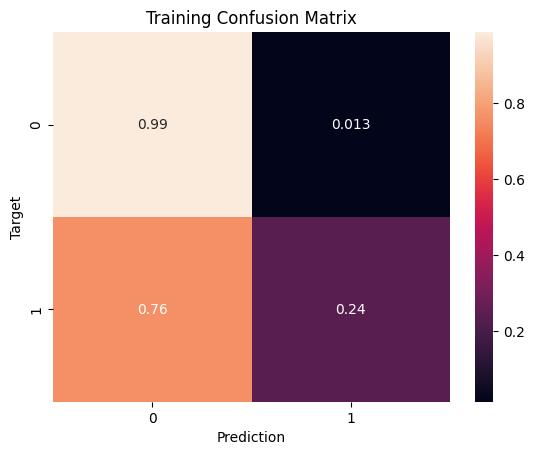

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

prediction on training set has generated 89.43% accuracy which is better than our dumb model.

Let's compute the model's accuracy on the validation.

Accuracy: 89.74%


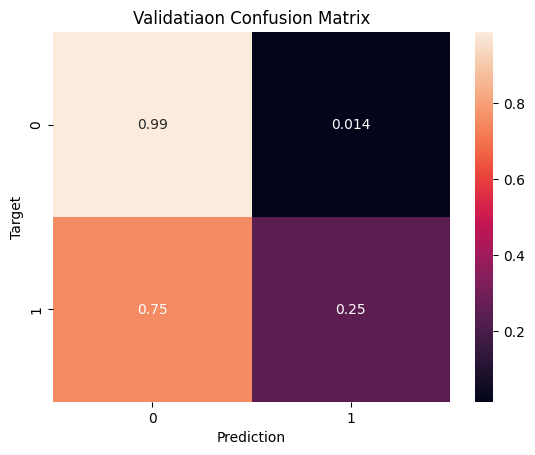

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Also, the val preds has an accuracy of 89.74% on predicting always "NO" which is slightly better than the train preds and the dumb model.

Let's compute the model's accuracy on the test sets too.

In [ ]:
submissions_df = pd.read_csv('./DontGetKicked/example_entry.csv')

In [ ]:
preds=model.predict(X_test)
submissions_df['IsBadBuy']=preds
submissions_df.to_csv('Submissions.csv',index=False)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-e43f2


'https://jovian.com/josephatkariuki24/car-use-e43f2'

# Training a Random Forest Model

We'll use the RandomForestClassifier class from sklearn.ensemble.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1 = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
%%time
model1.fit(X_train, train_targets)

CPU times: user 26.1 s, sys: 139 ms, total: 26.2 s
Wall time: 15.4 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model1.score(X_train, train_targets)

0.9966601582571164

In [ ]:
model1.score(X_val, val_targets)

0.8973761731862712

The training accuracy is almost 100% but the validation accuracy has remain to be 89.73% same as the one for validation accuracy for logistic regression model.

Let's look at the probabilities for the predictions.

In [ ]:
train_probs = model1.predict_proba(X_train)
train_probs

array([[0.945, 0.055],
       [0.95 , 0.05 ],
       [1.   , 0.   ],
       ...,
       [0.99 , 0.01 ],
       [0.97 , 0.03 ],
       [1.   , 0.   ]])

## Feature Importance

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model1.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
17,WheelType_nan,0.118416
2,MMRAcquisitionAuctionCleanPrice,0.085024
1,MMRAcquisitionAuctionAveragePrice,0.083903
5,MMRCurrentAuctionAveragePrice,0.083185
6,MMRCurrentAuctionCleanPrice,0.082618
10,WarrantyCost,0.081336
3,MMRAcquisitionRetailAveragePrice,0.080955
4,MMRAcquisitonRetailCleanPrice,0.080866
8,MMRCurrentRetailCleanPrice,0.080855
7,MMRCurrentRetailAveragePrice,0.080613


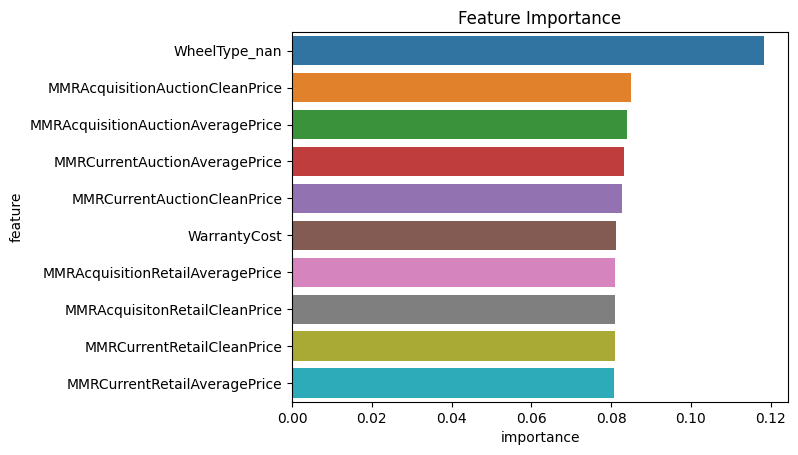

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Whhel type, MMRAcquisitionAuctionCleanprice,MMRAcquisitionAuctionAverage price, and VehiclesAge are most important feature in determining the accuracy of the model.




In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-f3137


'https://jovian.com/josephatkariuki24/car-use-f3137'

#  Random Forests Based model

Let's create a base model with which we can compare models with tuned hyperparameters.

In [ ]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)


In [ ]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [ ]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9966601582571164, 0.8973761731862712)

## Hyperparameters

In [ ]:
def test_params(**params):
    model1=RandomForestClassifier(n_jobs=-1, random_state=42,**params)
    model1.fit(X_train, train_targets)
    train_score=model1.score(X_train, train_targets)
    val_score= model1.score(X_val, val_targets)
    return train_score, val_score

In [ ]:
test_params(n_estimators=100)

(0.9966601582571164, 0.8973761731862712)

In [ ]:
test_params(n_estimators=500)

(0.9967457952248827, 0.8975131876412962)

In [ ]:
def test_params_and_plot(param_name, param_values):
    train_grade, val_grade =[], []
    for value in param_values:
        params={param_name:value}
        train_score, val_score=test_params(**params)
        train_grade.append(train_score)
        val_grade.append(val_score)

    plt.figure(figsize=(10,6))
    plt.title("Overfitting Curve"+ param_name)
    plt.plot(param_values, train_grade, 'b-o')
    plt.plot(param_values, val_grade, 'r-o')
    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(['Training', 'Validation'])

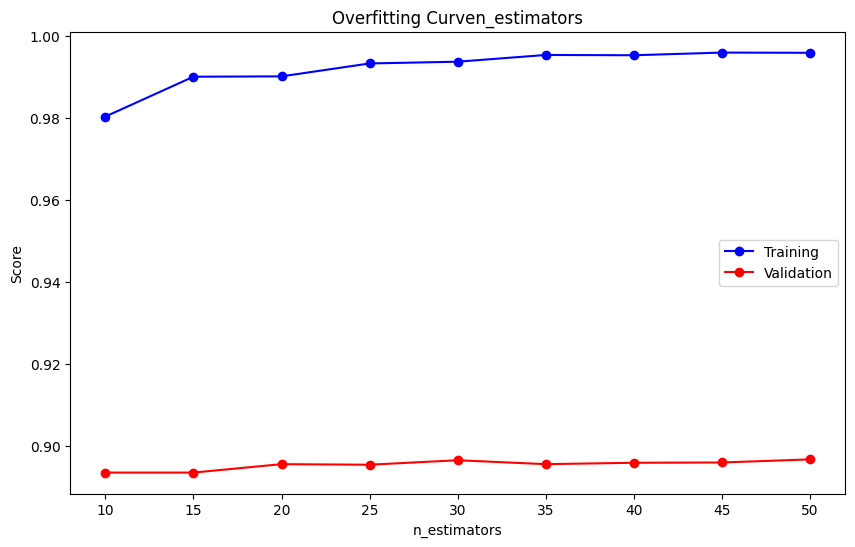

In [ ]:
test_params_and_plot('n_estimators', [10,15,20,25,30,35,40,45,50])

In [ ]:
test_params(n_estimators=15)

(0.9901174939197753, 0.8934712612180585)

In [ ]:
def test_params_and_plot(param_name, param_values):
    train_grade, val_grade =[], []
    for value in param_values:
        params={param_name:value}
        train_score, val_score=test_params(**params)
        train_grade.append(train_score)
        val_grade.append(val_score)

    plt.figure(figsize=(10,6))
    plt.title("Overfitting Curve"+ param_name)
    plt.plot(param_values, train_grade, 'b-o')
    plt.plot(param_values, val_grade, 'r-o')
    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(['Training', 'Validation'])

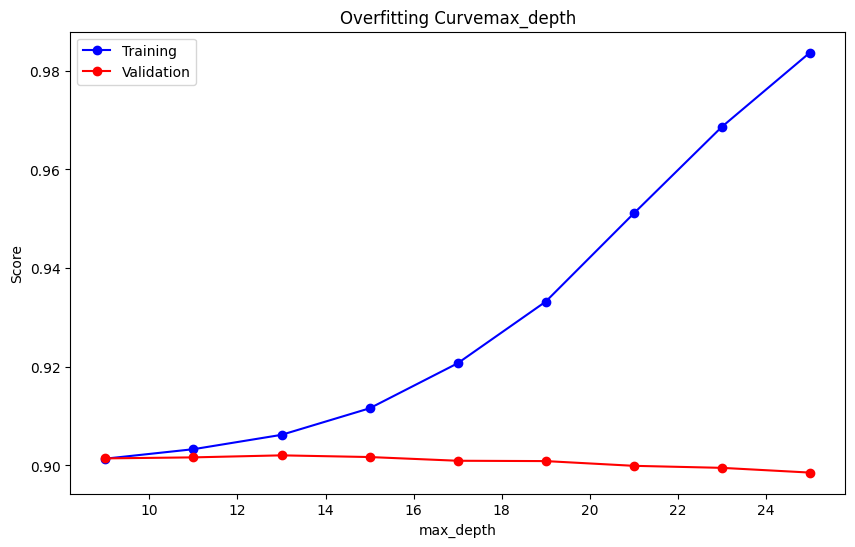

In [ ]:
test_params_and_plot('max_depth', [9,11,13,15,17,19,21,23,25])

In [ ]:
test_params(max_depth=11)

(0.9032816086048026, 0.9016236212920463)

# Putting every thing together

In [ ]:
model1= RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=500,max_depth=11)

In [ ]:
model1.fit(X_train, train_targets)

RandomForestClassifier(max_depth=11, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
train_preds=model1.predict(X_train)

In [ ]:
model1.score(X_train, train_targets)

0.9032130990305896

In [ ]:
model1.score(X_val, val_targets)

0.9017606357470713

Upon fine-tuning the RandomForest classification algorithm by adjusting the parameters max_depth and n_estimators, the trained model achieved a classification rate of 90.32% for the training data and 90.17% for the validation data.

In [ ]:
test_pred= model1.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
preds=model1.predict(X_test)
submissions_df['IsBadBuy']=preds
submissions_df.to_csv('Submissions.csv',index=False)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore', category=UserWarning)

model2 = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
model2.fit(X_train, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [ ]:
train_preds= model2.predict(X_train)

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model2.score(X_train, train_targets)

0.9111773370328503

In [ ]:
model2.score(X_val, val_targets)

0.9010755634719463

# Feature importance

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model2.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)


,feature,importance
17,WheelType_nan,0.613315
12,Auction_MANHEIM,0.061288
0,VehicleAge,0.050346
25,PRIMEUNIT_nan,0.030307
23,PRIMEUNIT_NO,0.024676
11,Auction_ADESA,0.016419
19,TopThreeAmericanName_FORD,0.013996
2,MMRAcquisitionAuctionCleanPrice,0.013222
9,IsOnlineSale,0.012721
4,MMRAcquisitonRetailCleanPrice,0.012554


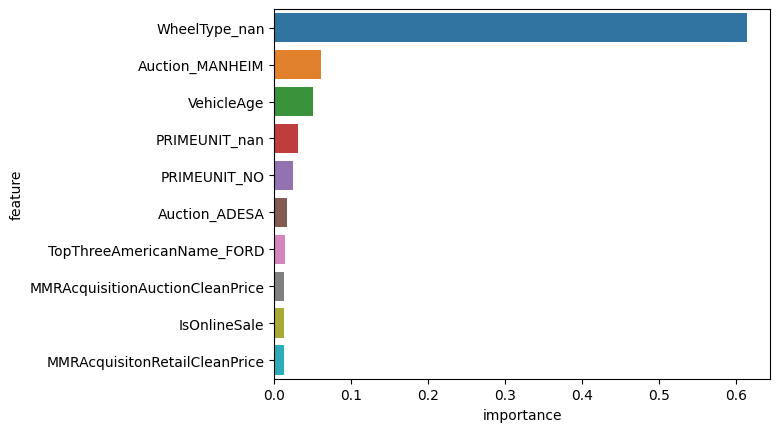

In [ ]:
sns.barplot(data=importance_df.head(10), y='feature', x='importance');

WheelType,Auction, and VehicleAge are top three important input variables in determining the accuracy of the model.

## Hyper-Parameters

In [ ]:
def test_params(**params):
    model2=XGBClassifier(n_jobs=-1, random_state=42,eval_metric='logloss', use_label_encoder=False,**params)
    model2.fit(X_train, train_targets)
    train_score=model2.score(X_train, train_targets)
    val_score= model2.score(X_val, val_targets)
    return train_score, val_score

In [ ]:
test_params(n_estimators=10)

(0.9013290857397321, 0.9018976502020963)

In [ ]:
test_params(n_estimators=40)

(0.9043092522179975, 0.9025142152497089)

In [ ]:
def test_params_and_plot(param_name, param_values):
    train_grade, val_grade =[], []
    for value in param_values:
        params={param_name:value}
        train_score, val_score=test_params(**params)
        train_grade.append(train_score)
        val_grade.append(val_score)

    plt.figure(figsize=(10,6))
    plt.title("Overfitting Curve"+ param_name)
    plt.plot(param_values, train_grade, 'b-o')
    plt.plot(param_values, val_grade, 'r-o')
    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(['Training', 'Validation'])

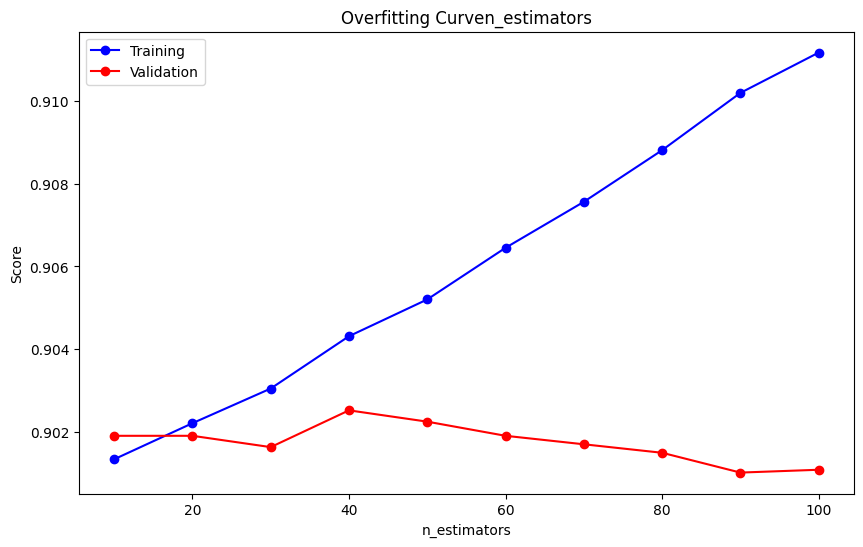

In [ ]:
test_params_and_plot('n_estimators', [10,20,30,40,50,60,70,80,90,100])

In [ ]:
test_params(n_estimators=30)

(0.903041825095057, 0.9016236212920463)

In [ ]:
# Max depth

In [ ]:
def test_params_and_plot(param_name,param_value):
    train_grade, val_grade= [], []
    for value in param_value:
        params={param_name:value}
        train_score, val_score= test_params(**params)
        train_grade.append(train_score)
        val_grade.append(val_score)


    plt.figure(figsize=(10,6))
    plt.title('Overfitting ' + param_name)
    plt.plot(param_value,train_grade, 'r-o')
    plt.plot(param_value,val_grade,'b-o')
    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(['Training', 'validation'])

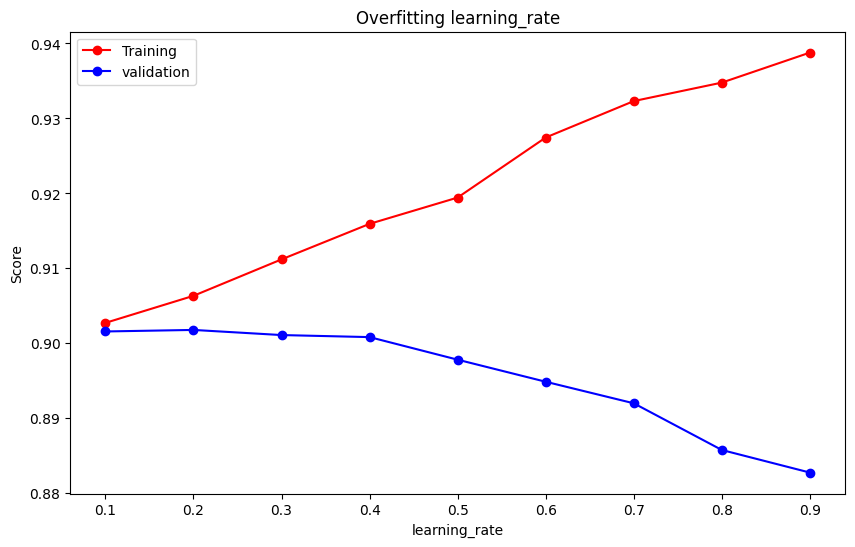

In [ ]:
test_params_and_plot('learning_rate', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])


In [ ]:
test_params(learning_rate=0.2)

(0.9063131572637276, 0.9017606357470713)

In [ ]:
# Max_depth

In [ ]:
def test_params(**params):
    model2=XGBClassifier(n_jobs=-1, random_state=42,eval_metric='logloss', use_label_encoder=False,**params)
    model2.fit(X_train, train_targets)
    train_score=model2.score(X_train, train_targets)
    val_score= model2.score(X_val, val_targets)
    return train_score, val_score

In [ ]:
def test_params_and_plot(param_name,param_value):
    train_grade, val_grade= [], []
    for value in param_value:
        params={param_name:value}
        train_score, val_score= test_params(**params)
        train_grade.append(train_score)
        val_grade.append(val_score)


    plt.figure(figsize=(10,6))
    plt.title('Overfitting ' + param_name)
    plt.plot(param_value,train_grade, 'r-o')
    plt.plot(param_value,val_grade,'b-o')
    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(['Training', 'validation'])

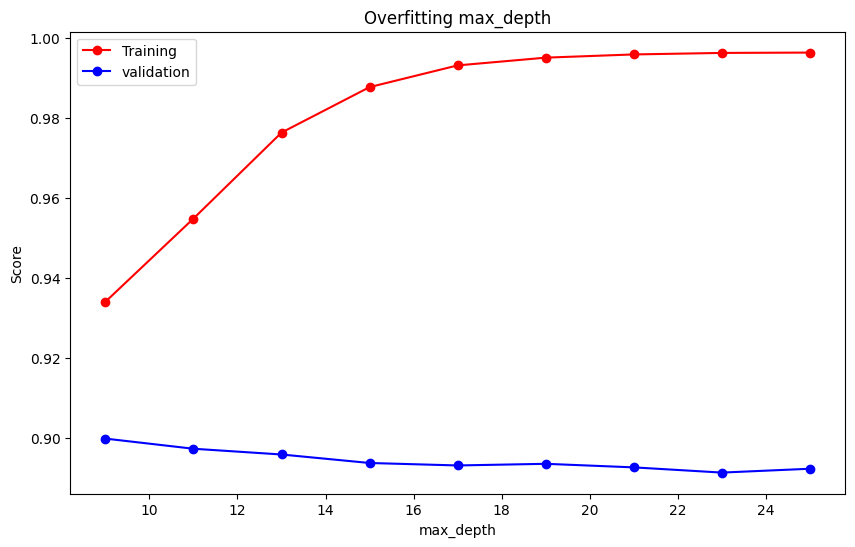

In [ ]:
test_params_and_plot('max_depth', [9,11,13,15,17,19,21,23,25])

In [ ]:
test_params(max_depth=5)

(0.9059020998184496, 0.9014866068370213)

## Putting every thing together

In [ ]:
model2= XGBClassifier(n_estimators=40,
                     n_jobs=-1, random_state=42,
                     max_depth=2,learning_rate=0.02)

In [ ]:
model2.fit(X_train, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
train_preds=model2.predict(X_train)

In [ ]:
model.score(X_train, train_targets)

0.8943068543829

In [ ]:
model.score(X_val, val_targets)

0.8973761731862712

After adjusting the parameters of the XGBoost classification algorithms, including max_depth, learning_rate, and n_estimators, the model was fine-tuned. Upon completing the training process, the classification accuracy for the training data was 89.43%, while for the validation data it reached 89.73%.

In [ ]:
test_pred= model.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
preds=model2.predict(X_test)
submissions_df['IsBadBuy']=preds
submissions_df.to_csv('Submissions.csv',index=False)

## Conclusion

In this project, an exploratory analysis was performed on the Don'tGetKicked dataset. We employed three different machine learning algorithms, namely Logistic Regression, RandomForest, and XGBoost, to classify the auctioned cars as either good or bad. After training the models for prediction, it can be concluded that all three algorithms exhibited satisfactory accuracy. However, among the three, the RandomForest algorithm demonstrated the highest performance.

## Future Work


To evaluate the performance of other machine learning algorithms, such as LightGBM or KNN, I will calculate their respective accuracy scores. The algorithm with the highest score will then be compared to the accuracy score obtained from the RandomForest model, in order to determine which one achieves a higher accuracy level.

## References

https://jovian.com/godspoweriheanachoc/jovian-gbm-assignment

https://www.kaggle.com/code/balajinagappan/don-t-get-kicked-sklearn-from-scratch

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/josephatkariuki24/car-use-3e72a


'https://jovian.com/josephatkariuki24/car-use-3e72a'